In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns

In [73]:
#define header
col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

#define number of columns from csv
use=list(np.arange(len(col)))

#read the data from csv
df_air=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DMT/air+quality/AirQualityUCI.csv',header=None,skiprows=1,names=col,na_filter=True,
                   na_values=-200,usecols=use)
df_air.head()


,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [74]:
df_air.tail()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df_air.shape

(9471, 15)

# DATA CLEANING

In [76]:
# drop the column with NaN values
df_air.dropna(axis=1, how="all", inplace=True)

# drop the rows with NaN values
df_air.dropna(axis=0, how="all", inplace=True)

# drop the rows which doesn't have 10 non-NaN values
df_air.dropna(thresh=10,axis=0,inplace=True)

In [77]:
df_air.shape

(8991, 15)

In [78]:
#Split hour from time into new column
df_air['HOUR']=df_air['TIME'].apply(lambda x: int(x.split(':')[0]))
df_air.HOUR.head()

0    18
1    19
2    20
3    21
4    22
Name: HOUR, dtype: int64

In [79]:
df_air['DATE'] = pd.to_datetime(df_air.DATE, format='%m/%d/%Y')

In [80]:
df_air.head()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,HOUR
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22


In [81]:
missing_info = df_air.shape[0] - df_air.count()
missing_percent = (missing_info / df_air.shape[0] * 100).round(2)

missing_info_percent = pd.concat([missing_info, missing_percent], axis=1)
missing_info_percent.columns = ['Count of Missing Values', 'Percentage of Missing Values (%)']

print('Missing Values Summary:\n', missing_info_percent)


Missing Values Summary:
               Count of Missing Values  Percentage of Missing Values (%)
DATE                                0                              0.00
TIME                                0                              0.00
CO_GT                            1647                             18.32
PT08_S1_CO                          0                              0.00
NMHC_GT                          8104                             90.13
C6H6_GT                             0                              0.00
PT08_S2_NMHC                        0                              0.00
NOX_GT                           1595                             17.74
PT08_S3_NOX                         0                              0.00
NO2_GT                           1598                             17.77
PT08_S4_NO2                         0                              0.00
PT08_S5_O3                          0                              0.00
T                                   0  

In [82]:
#set date as a index
df_air.set_index('DATE', inplace=True)
#Create month column and set the value of month
df_air['MONTH']=df_air.index.month
df_air.reset_index(inplace=True)


In [83]:
# Drop the column NMHC_GT which has 90% of missing value
df_air.drop('NMHC_GT', axis=1, inplace=True)

In [84]:
df_air.head()

,DATE,TIME,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,HOUR,MONTH
0,2004-03-10,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,3
1,2004-03-10,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19,3
2,2004-03-10,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,3
3,2004-03-10,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,3
4,2004-03-10,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,3


In [85]:
# Fill the NaN with the monthly average of particular hour

df_air['CO_GT'] = df_air['CO_GT'].fillna(df_air.groupby(['MONTH', 'HOUR']) ['CO_GT'].transform('mean'))

df_air['NOX_GT'] = df_air['NOX_GT'].fillna(df_air.groupby(['MONTH', 'HOUR']) ['NOX_GT'].transform('mean'))

df_air['NO2_GT'] = df_air['NO2_GT'].fillna(df_air.groupby(['MONTH', 'HOUR']) ['NO2_GT'].transform('mean'))

In [86]:
print('Still left out values: \n', df_air.shape[0] - df_air.count())

Still left out values: 
 DATE              0
TIME              0
CO_GT            30
PT08_S1_CO        0
C6H6_GT           0
PT08_S2_NMHC      0
NOX_GT          261
PT08_S3_NOX       0
NO2_GT          261
PT08_S4_NO2       0
PT08_S5_O3        0
T                 0
RH                0
AH                0
HOUR              0
MONTH             0
dtype: int64


In [87]:
# Fill the left out values with Hourly mean

df_air['CO_GT'] = df_air['CO_GT'].fillna(df_air.groupby(['HOUR']) ['CO_GT'].transform('mean'))

df_air['NOX_GT'] = df_air['NOX_GT'].fillna(df_air.groupby(['HOUR']) ['NOX_GT'].transform('mean'))

df_air['NO2_GT'] = df_air['NO2_GT'].fillna(df_air.groupby(['HOUR']) ['NO2_GT'].transform('mean'))

In [88]:
print('Still left out values: \n', df_air.shape[0] - df_air.count())

Still left out values: 
 DATE            0
TIME            0
CO_GT           0
PT08_S1_CO      0
C6H6_GT         0
PT08_S2_NMHC    0
NOX_GT          0
PT08_S3_NOX     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
HOUR            0
MONTH           0
dtype: int64


# FEATURE SELECTION

<ipython-input-89-8f4cb9f3927f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_air.corr(), annot=True, cmap='RdYlGn')


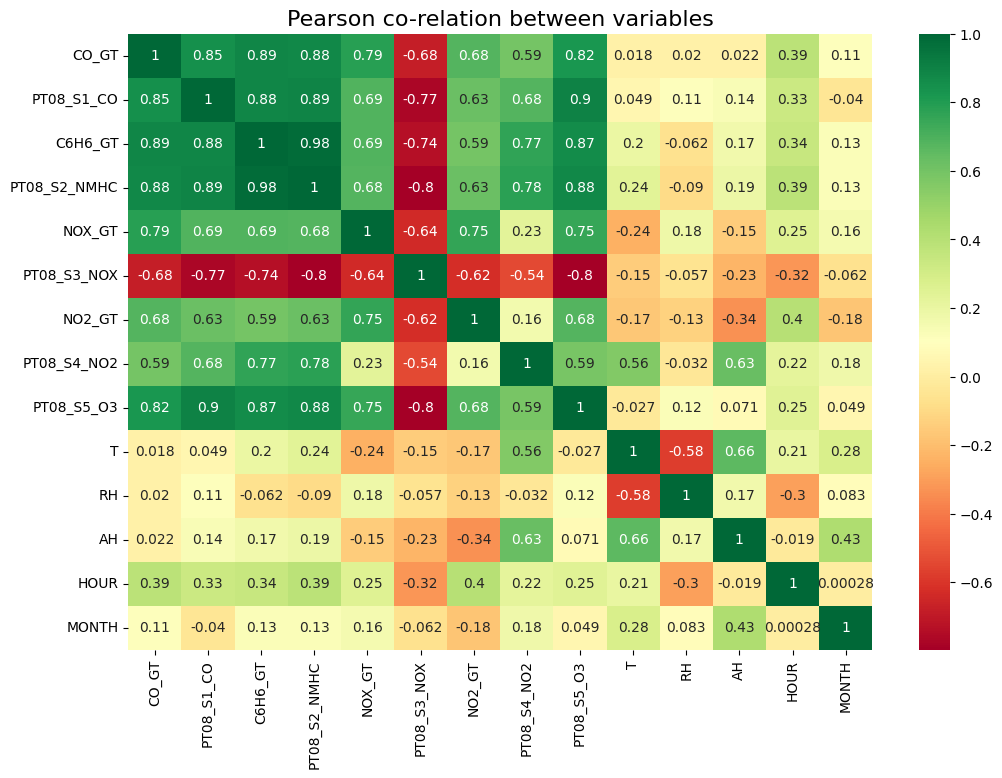

In [89]:
#Use heatmap to see corelation between variables

plt.figure(figsize=(12, 8))
sns.heatmap(df_air.corr(), annot=True, cmap='RdYlGn')

plt.title('Pearson co-relation between variables', fontsize=16)

plt.show()


# LINEAR REGRESSION with feature selection

In [90]:
from sklearn.preprocessing import StandardScaler         #import normalisation package
from sklearn.model_selection import train_test_split      #import train test split
from sklearn.linear_model import LinearRegression         #import linear regression package
from sklearn.metrics import mean_squared_error,mean_absolute_error   #import mean squared error and mean absolute error

In [91]:
# Calculate Pearson correlation between features and the target variable 'RH'
correlation_with_target = df_air.corr()['RH']

threshold = 0.0
# Exclude 'RH' from the selected features
selected_features = correlation_with_target[correlation_with_target > threshold].index.tolist()
selected_features.remove('RH')

print("Selected Features with Positive Pearson Correlation with 'RH':")
print(selected_features)

X=df_air[selected_features]     #X-input features
y=df_air['RH']                    #y-input features

ss=StandardScaler()     #initiatilise
X_std=ss.fit_transform(X)     #apply stardardisation

#split the data into train and test with test size and 30% and train size as 70%
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)

print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

lr=LinearRegression()
lr_model_FS=lr.fit(X_train,y_train)          #fit the linear model on train data

y_pred=lr_model_FS.predict(X_test)                      #predict using the model
rmse=np.sqrt(mean_squared_error(y_test,y_pred))      #calculate rmse
print('Baseline RMSE of model:',rmse)

Selected Features with Positive Pearson Correlation with 'RH':
['CO_GT', 'PT08_S1_CO', 'NOX_GT', 'PT08_S5_O3', 'AH', 'MONTH']
Training data size: (6293, 6)
Test data size: (2698, 6)
Baseline RMSE of model: 16.204255026056515


<ipython-input-91-0b509b62959f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = df_air.corr()['RH']


# LINEAR REGRESSION without feature selection

In [92]:
col_=df_air.columns.tolist()[2:]
X=df_air[col_].drop(columns=['RH'], axis=1)     #X-input features
y=df_air['RH']                    #y-input features

ss=StandardScaler()     #initiatilise
X_std=ss.fit_transform(X)     #apply stardardisation

#split the data into train and test with test size and 30% and train size as 70%
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)

print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)          #fit the linear model on train data

y_pred=lr_model.predict(X_test)                      #predict using the model
rmse=np.sqrt(mean_squared_error(y_test,y_pred))      #calculate rmse
print('Baseline RMSE of model:',rmse)

Training data size: (6293, 13)
Test data size: (2698, 13)
Baseline RMSE of model: 6.01289437121927


In [93]:
# Print the first few rows of the training dataset
print("Training Data:")
print(X_train[:5])  # This will print the first 5 rows of the training data

# Print the first few rows of the testing dataset
print("\nTesting Data:")
print(X_test[:5])

Training Data:
[[-0.86182547 -0.58890849 -0.84343716 -0.90006913 -1.00883213  0.57050102
  -1.54291658  0.14077746 -1.32485898  2.14934081  1.93954639  0.50924955
   0.19726939]
 [-0.86182547 -1.00352517 -0.68235048 -0.66020399 -1.00375313  0.16941542
  -1.16923384 -0.19718964 -0.92080553  0.56412849  0.62871699 -1.5159393
   0.49072555]
 [ 0.37191518 -0.1742918  -0.26620988 -0.13549898  0.174574   -0.46141824
   1.7982467  -0.91067575 -0.760188   -1.59855402 -0.93224234  1.23253128
  -1.27001143]
 [ 1.53308285  1.56709828  1.41177639  1.39738922  2.66328218 -1.16234452
   0.25955309  0.57984583  1.2349828  -0.98711499 -0.1407421  -0.50334488
   1.37109404]
 [ 0.87992604  0.92213899  0.98221191  1.05633096 -0.19619273 -0.73010665
   0.3254971   1.41465346  0.94888283 -0.09260232  0.22776614  1.66650032
  -0.38964294]]

Testing Data:
[[-0.49896057  0.21268377 -0.19909043 -0.06054112 -0.79551429  0.03701824
  -0.26799901  0.34298     0.35911536  0.14517953  0.2391582   1.52184397
  -0.68

# DECISION TREE WITH FEATURE SELECTION

In [94]:
from sklearn.tree import DecisionTreeRegressor         #Decision tree regression model
from sklearn.model_selection import cross_val_score    #import cross validation score package
from sklearn.model_selection import GridSearchCV        #import grid search cv

In [95]:
# Calculate Pearson correlation between features and the target variable 'RH'
correlation_with_target = df_air.corr()['RH']

threshold = 0.0
# Exclude 'RH' from the selected features
selected_features = correlation_with_target[correlation_with_target > threshold].index.tolist()
selected_features.remove('RH')

print("Selected Features with Positive Pearson Correlation with 'RH':")
print(selected_features)

X=df_air[selected_features]     #X-input features
y=df_air['RH']                    #y-input features

ss=StandardScaler()     #initiatilise
X_std=ss.fit_transform(X)     #apply stardardisation

#split the data into train and test with test size and 30% and train size as 70%
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)

print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

dt_one_reg=DecisionTreeRegressor()
dt_model_FS=dt_one_reg.fit(X_train,y_train)         #fit the model
y_pred_dtone=dt_model_FS.predict(X_test)
print('RMSE of Decision Tree Regression:',np.sqrt(mean_squared_error(y_pred_dtone,y_test)))

<ipython-input-95-39aa24b0dd79>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = df_air.corr()['RH']


Selected Features with Positive Pearson Correlation with 'RH':
['CO_GT', 'PT08_S1_CO', 'NOX_GT', 'PT08_S5_O3', 'AH', 'MONTH']
Training data size: (6293, 6)
Test data size: (2698, 6)
RMSE of Decision Tree Regression: 12.960044803343472


# DECISION TREE without feature selection

In [96]:
col_=df_air.columns.tolist()[2:]
X=df_air[col_].drop(columns=['RH'], axis=1)     #X-input features
y=df_air['RH']                    #y-input features

ss=StandardScaler()     #initiatilise
X_std=ss.fit_transform(X)     #apply stardardisation

#split the data into train and test with test size and 30% and train size as 70%
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)

print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

dt_one_reg=DecisionTreeRegressor()
dt_model=dt_one_reg.fit(X_train,y_train)         #fit the model
y_pred_dtone=dt_model.predict(X_test)
print('RMSE of Decision Tree Regression:',np.sqrt(mean_squared_error(y_pred_dtone,y_test)))


Training data size: (6293, 13)
Test data size: (2698, 13)
RMSE of Decision Tree Regression: 1.3623185334232684


# RANDOM FOREST REGRESSION

In [97]:
from sklearn.ensemble import RandomForestRegressor           #import random forest regressor
rf_reg=RandomForestRegressor()
rf_model=rf_reg.fit(X_train,y_train)         #fit model
y_pred_rf=rf_model.predict(X_test)
#Calculate RMSE
print('RMSE of predicted RH in RF model:',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

RMSE of predicted RH in RF model: 0.6868108123202066


# SUPPORT VECTOR MACHINE

In [98]:
from sklearn.svm import SVR           #import support vector regressor
sv_reg=SVR()
sv_model=sv_reg.fit(X_train,y_train)    #train the model
y_pred_sv=sv_model.predict(X_test)
#Calculate RMSE of SVR
print('RMSE of SVR model:',np.sqrt(mean_squared_error(y_test,y_pred_sv)))

RMSE of SVR model: 3.9022790893220107


# ENSEMBLE

In [100]:
from sklearn.ensemble import GradientBoostingRegressor

# Standardize your data
ss = StandardScaler()
X_std = ss.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)

# Fit base models on the training data
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
sv_model.fit(X_train, y_train)

# Make predictions using the base models
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_svr = sv_model.predict(X_test)

# Create a new feature matrix using base model predictions
X_ensemble = np.column_stack((y_pred_lr, y_pred_dt, y_pred_rf, y_pred_svr))

# Initialize the Gradient Boosting model
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the Gradient Boosting model on the new feature matrix
gb_reg.fit(X_ensemble, y_test)

# Make predictions using the ensemble model
y_pred_ensemble = gb_reg.predict(X_ensemble)

print('Baseline RMSE of model:',rmse)
print('RMSE of Decision Tree Regression:',np.sqrt(mean_squared_error(y_pred_dtone,y_test)))
print('RMSE of predicted RH in RF model:',np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print('RMSE of SVR model:',np.sqrt(mean_squared_error(y_test,y_pred_sv)))
print('\n')
# Calculate the RMSE for the ensemble model
rmse_ensemble = np.sqrt(mean_squared_error(y_test, y_pred_ensemble))
print('RMSE of Gradient Boosting Ensemble:', rmse_ensemble)


Baseline RMSE of model: 6.01289437121927
RMSE of Decision Tree Regression: 1.3623185334232684
RMSE of predicted RH in RF model: 0.708177889832171
RMSE of SVR model: 3.9022790893220107


RMSE of Gradient Boosting Ensemble: 0.5259734457188636
